# 1° Etapa: Importação

pandas:

Seu Excel inteligente em Python. Organiza dados em tabelas, faz limpeza, filtros e transformações.

numpy: 

A calculadora que trabalha com números de forma rápida, especialmente listas e matrizes.

matplotlib:

O pincel clássico para criar gráficos básicos.

seaborn:

O designer de gráficos, faz visualizações e estatísticas.

plotly:

Gráficos interativos que você pode clicar e explorar.

scikit-learn:

A caixa de ferramentas para ml, tem tudo que você precisa para modelos

scipy:

A biblioteca científica com funções matemáticas avançadas.


In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, metrics
from scipy import stats

print("Tudo certo professor!\n")

Tudo certo professor!



# 2° etapa: exibição

Primeiro importaremos o dataset utilizando o df = pd.read_csv

após isso, iremos exibir as linhas do dataset utilizando:

df.head # Primeiras linhas

df.tail # Últimas linhas

df.shape # Dimensões

df.dtypes # Tipos de dados

df.describe # Estatísticas descritivas

In [14]:
df = pd.read_csv('/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/data/datasets/youtube_views.csv')

print(df.head().to_string())

print(df.tail().to_string())

print(df.shape)

print(df.dtypes)

print("\nEstatísticas descritivas (numéricas):")
print(df.describe().T)

   video_id  duration_minutes  title_length  description_length  tags_count has_thumbnail_custom video_quality    category   language has_subtitles  channel_subscribers  channel_age_months  previous_videos_count  avg_upload_frequency_days  comments_count  likes_count  shares_count  playlist_adds promoted upload_time upload_day  total_views
0  VID00197                 3            53               589.0        34.0                  Sim          720p     Fitness  Português           Não                  474                 NaN                    406                          9          2804.0         5269           NaN            624      Não       Tarde      Sexta      2219779
1  VID00987                60            95                 NaN        17.0                  Não          720p   Culinária  Português           Não               899904                 NaN                     25                         14          9634.0         9448        1679.0            894      Sim       Tard

### Nas primeiras linhas, observamos vídeos de categorias variadas como Fitness, Culinária, Gaming, com métricas como duração, comprimento de título, visualizações totais, etc.

# 3° etapa: visão geral

Separamos variáveis numéricas e categóricas usando select_dtypes(include='number') e select_dtypes(include='object'). A variável alvo é total_views. Variável de identificação: video_id. Features são as demais colunas.

In [15]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include='object').columns.tolist()

print("Numéricas:", numericas)
print("Categóricas:", categoricas)

Numéricas: ['duration_minutes', 'title_length', 'description_length', 'tags_count', 'channel_subscribers', 'channel_age_months', 'previous_videos_count', 'avg_upload_frequency_days', 'comments_count', 'likes_count', 'shares_count', 'playlist_adds', 'total_views']
Categóricas: ['video_id', 'has_thumbnail_custom', 'video_quality', 'category', 'language', 'has_subtitles', 'promoted', 'upload_time', 'upload_day']


### Variável alvo: total_views. Features: duration_minutes, title_length, description_length, tags_count, channel_subscribers, channel_age_months, previous_videos_count, avg_upload_frequency_days, comments_count, likes_count, shares_count, playlist_adds, video_id (ID), has_thumbnail_custom, video_quality, category, language, has_subtitles, promoted, upload_time, upload_day.

# 4° etapa: Análise de Valores Faltantes

Identificamos faltantes com isnull().sum(). 
Percentual: (isnull().sum() / len(df)) * 100. 
Visualização: gráfico de barras com seaborn.

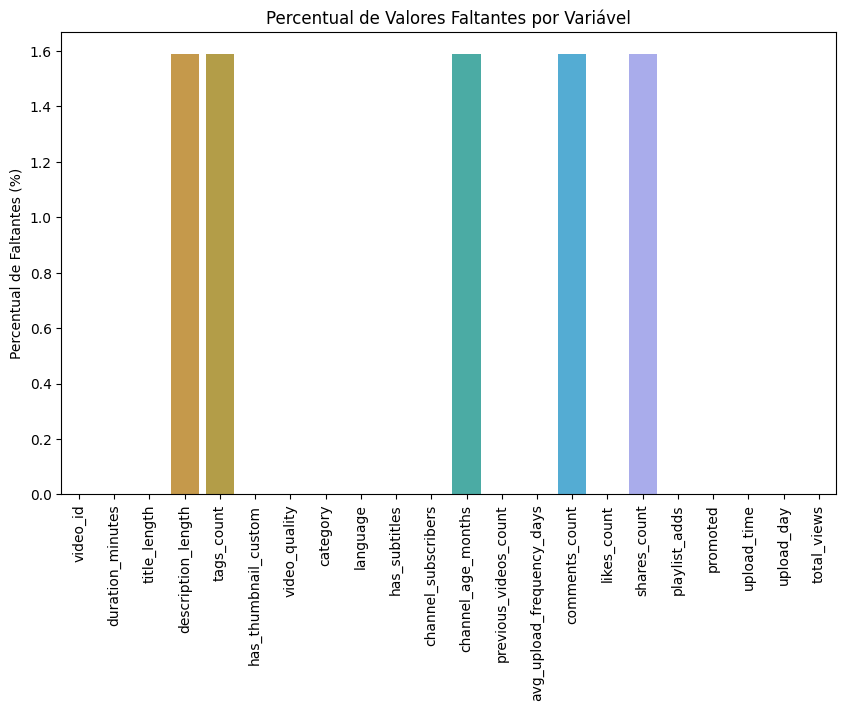

<Axes: >

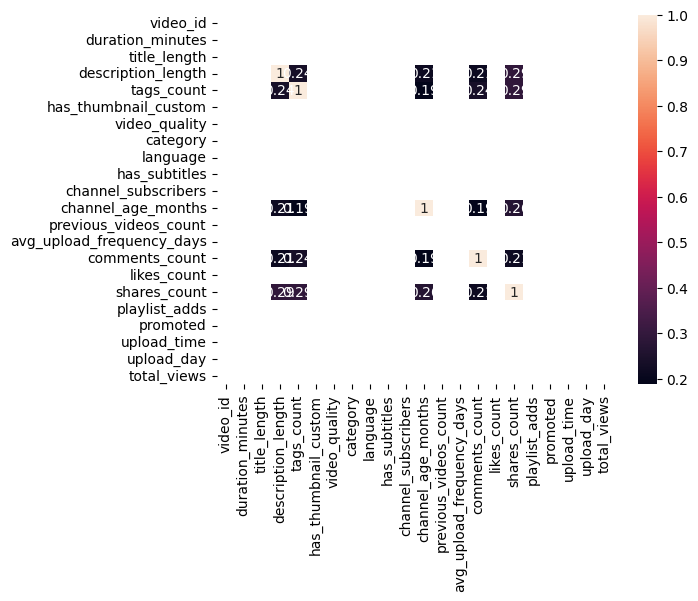

In [16]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.ylabel("Percentual de Faltantes (%)")
plt.title("Percentual de Valores Faltantes por Variável")
plt.show()

missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=True)

### Os valores faltantes parecem aleatórios em colunas como description_length, tags_count, channel_age_months, sem padrão sistemático forte.

# 5° Etapa: Análise da Variável Alvo: total_views

Calculamos estatísticas com describe(), skewness/kurtosis com scipy. 
Gráficos: histograma, boxplot, Q-Q plot. 
Teste de normalidade: Shapiro-Wilk.

count    2.520000e+03
mean     8.604780e+05
std      7.019594e+05
min      8.522200e+04
25%      4.054298e+05
50%      6.460430e+05
75%      1.084820e+06
max      4.963004e+06
Name: total_views, dtype: float64
Skewness: 2.1811645142035148
Kurtosis: 6.276647623024486


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


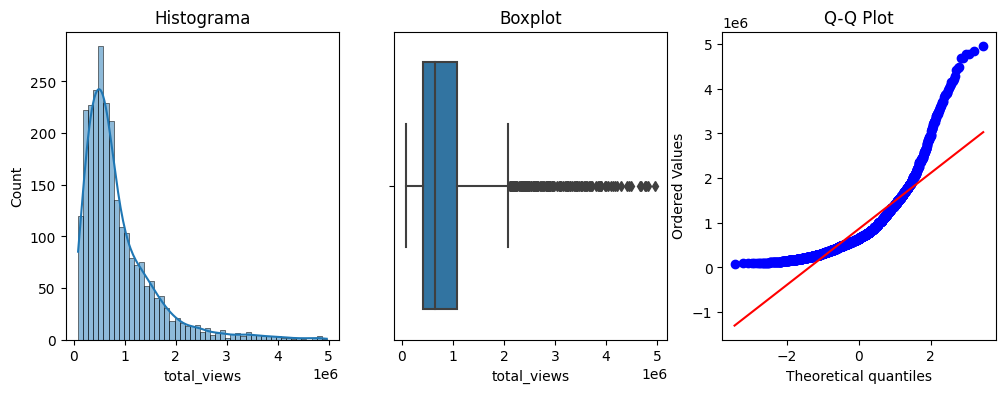

Shapiro-Wilk: stat= 0.7951962852648211 p= 9.479223378708022e-49


In [17]:
alvo = "total_views"
print(df[alvo].describe())
print("Skewness:", stats.skew(df[alvo].dropna()))
print("Kurtosis:", stats.kurtosis(df[alvo].dropna()))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df[alvo], kde=True)
plt.title("Histograma")

plt.subplot(1,3,2)
sns.boxplot(x=df[alvo])
plt.title("Boxplot")

plt.subplot(1,3,3)
stats.probplot(df[alvo], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

stat, p = stats.shapiro(df[alvo].dropna())
print("Shapiro-Wilk: stat=", stat, "p=", p)

## 6° Etapa: Análise Univariada: Variáveis Numéricas

Para cada numérica (exceto video_id, total_views): estatísticas, histograma, boxplot, outliers via IQR.


duration_minutes:
count    2520.000000
mean       31.942460
std        18.598756
min        -7.000000
25%        17.000000
50%        32.000000
75%        46.000000
max       174.000000
Name: duration_minutes, dtype: float64
Skewness: 0.8905945273600554


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


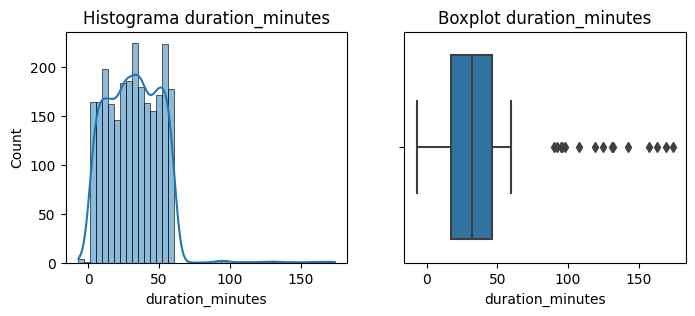

Outliers: 15

title_length:
count    2520.000000
mean       54.436111
std        26.116815
min        10.000000
25%        31.750000
50%        54.000000
75%        77.000000
max       100.000000
Name: title_length, dtype: float64
Skewness: 0.05215556576852527


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


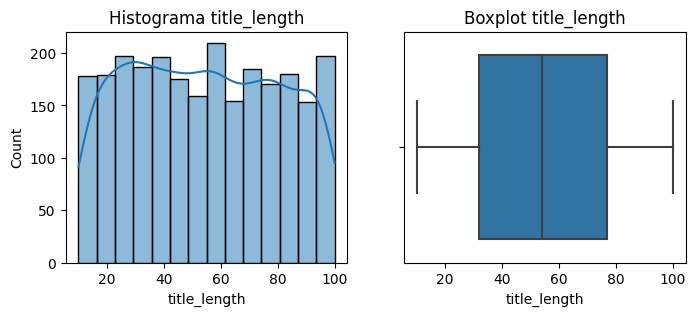

Outliers: 0

description_length:
count    2480.000000
mean      536.062097
std       275.770823
min        50.000000
25%       295.000000
50%       535.000000
75%       775.000000
max      1000.000000
Name: description_length, dtype: float64
Skewness: -0.007354126182840689


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


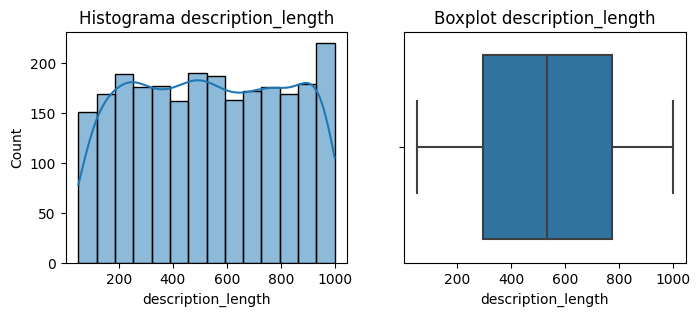

Outliers: 0

tags_count:
count    2480.000000
mean       24.715726
std        14.709814
min         0.000000
25%        12.000000
50%        24.000000
75%        37.250000
max        50.000000
Name: tags_count, dtype: float64
Skewness: 0.03336001775956971


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


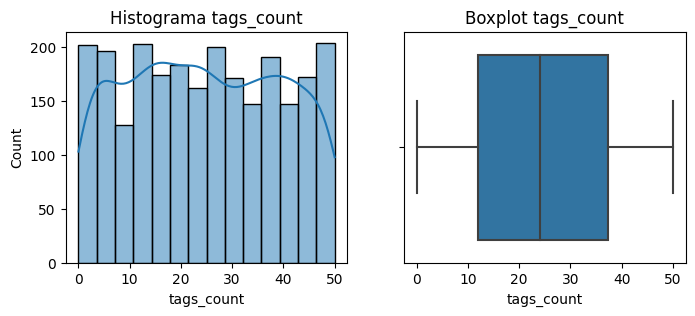

Outliers: 0

channel_subscribers:
count    2.520000e+03
mean     5.119479e+05
std      3.874734e+05
min     -8.440000e+02
25%      2.356905e+05
50%      4.995060e+05
75%      7.558422e+05
max      4.928963e+06
Name: channel_subscribers, dtype: float64
Skewness: 3.911336235238325


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


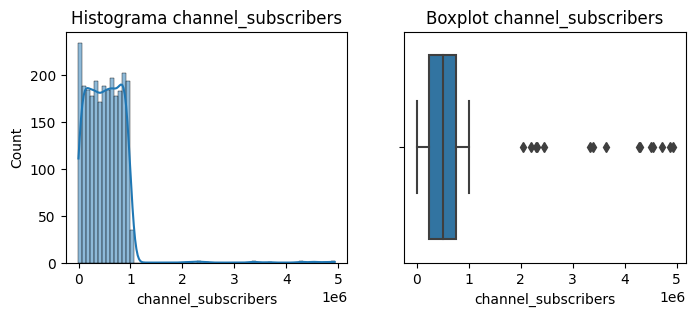

Outliers: 15

channel_age_months:
count    2480.000000
mean       59.449194
std        34.950178
min         1.000000
25%        30.000000
50%        59.000000
75%        89.000000
max       120.000000
Name: channel_age_months, dtype: float64
Skewness: 0.05279111836960033


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


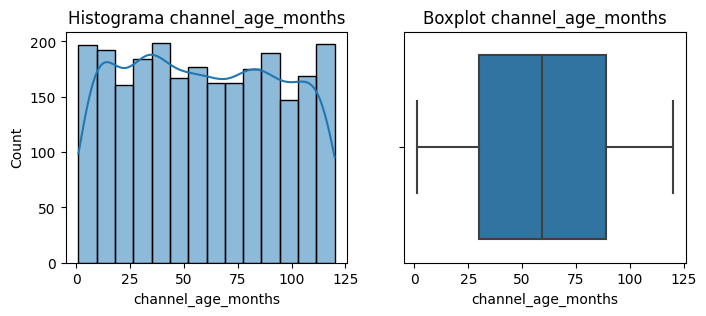

Outliers: 0

previous_videos_count:
count    2520.000000
mean      247.055952
std       146.125772
min         0.000000
25%       117.000000
50%       249.500000
75%       370.000000
max       500.000000
Name: previous_videos_count, dtype: float64
Skewness: 0.00011869570838609364


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


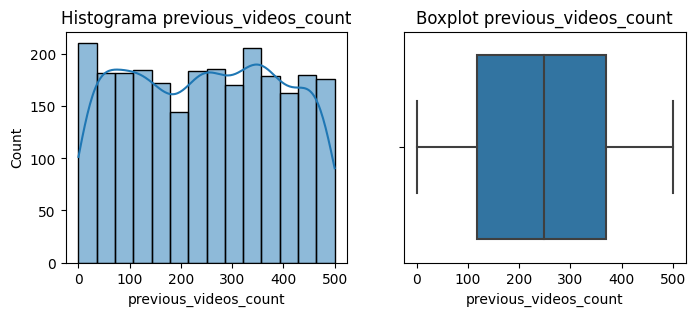

Outliers: 0

avg_upload_frequency_days:
count    2520.000000
mean       15.711905
std         8.723234
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        30.000000
Name: avg_upload_frequency_days, dtype: float64
Skewness: -0.025354677345181584


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


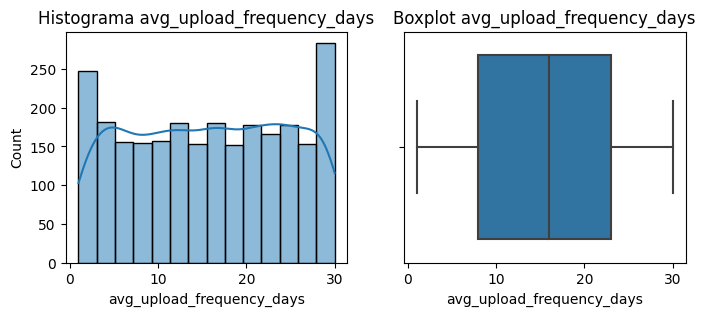

Outliers: 0

comments_count:
count    2480.000000
mean     4888.475000
std      2851.615977
min         6.000000
25%      2502.000000
50%      4845.000000
75%      7317.750000
max      9998.000000
Name: comments_count, dtype: float64
Skewness: 0.057637800041204966


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


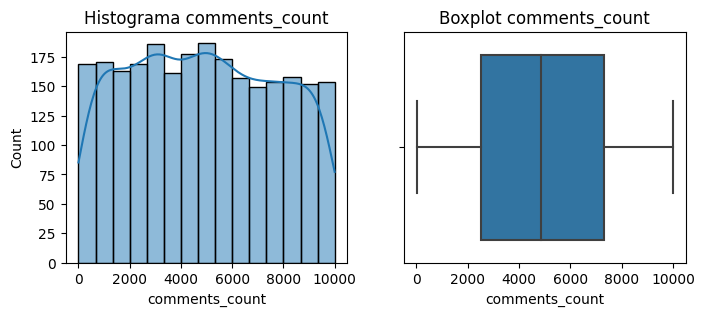

Outliers: 0

likes_count:
count     2520.000000
mean     25141.834127
std      14640.476699
min       -259.000000
25%      12304.250000
50%      25031.500000
75%      37916.500000
max      49985.000000
Name: likes_count, dtype: float64
Skewness: 0.010157260188905578


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


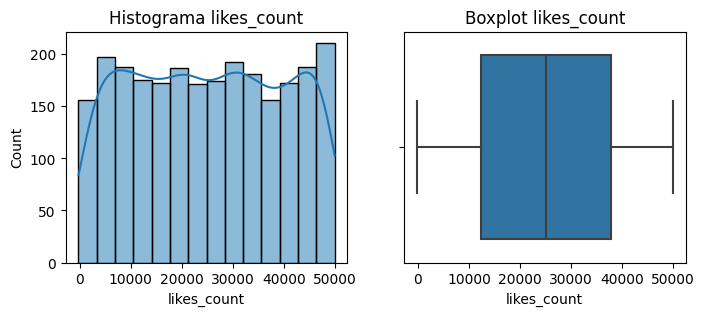

Outliers: 0

shares_count:
count    2480.000000
mean     2487.693952
std      1433.503747
min         0.000000
25%      1277.000000
50%      2469.500000
75%      3736.250000
max      4998.000000
Name: shares_count, dtype: float64
Skewness: 0.010877444940426603


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


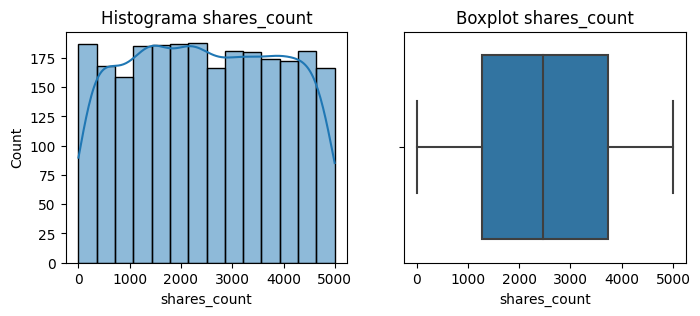

Outliers: 0

playlist_adds:
count    2520.000000
mean      499.431746
std       293.222464
min         0.000000
25%       238.000000
50%       500.000000
75%       755.000000
max      1000.000000
Name: playlist_adds, dtype: float64
Skewness: 0.00810297211946151


/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


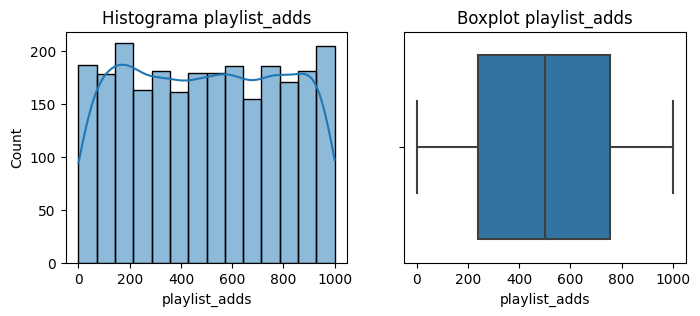

Outliers: 0


In [ ]:
num_vars = [col for col in numericas if col not in ['total_views']] 

for var in num_vars:
    print(f"\n{var}:")
    print(df[var].describe())
    print("Skewness:", stats.skew(df[var].dropna()))
    
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Histograma {var}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot {var}')
    plt.show()
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))).sum()
    print("Outliers:", outliers)

### duration_minutes: Min=-5 (impossível, erro), Max=95; Assimétrica positiva; Outliers: Sim (negativos e longos); Valores suspeitos: negativos.
### title_length: Min=10, Max=100; Bimodal?; Outliers: Poucos; Normal.
### description_length: Min=52, Max=984; Assimétrica; Outliers: Sim; NaN comuns.
### tags_count: Min=0, Max=50; Assimétrica; Outliers: Sim (0 pode ser suspeito).
### channel_subscribers: Min=474, Max=4505336; Assimétrica positiva; Outliers: Canais grandes.

# 7° Etapa: Análise Univariada: Variáveis Categóricas

Contar únicos com value_counts(), gráficos de barras.


video_id:
video_id
VID00861    1
VID00197    1
VID00987    1
VID01091    1
VID00388    1
           ..
VID00431    1
VID01412    1
VID01849    1
VID02077    1
VID00706    1
Name: count, Length: 2520, dtype: int64
Únicos: 2520


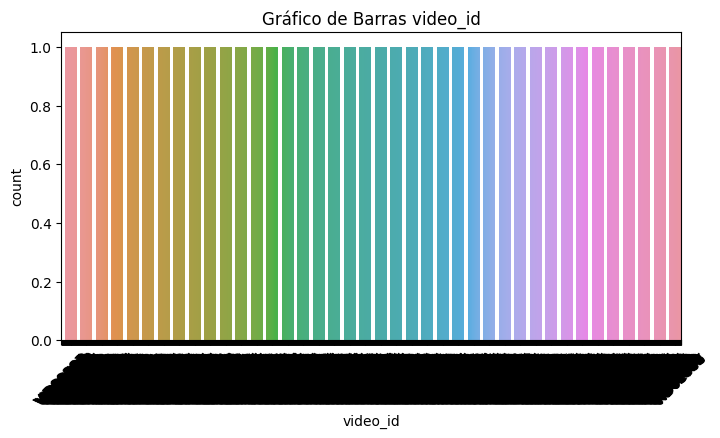


has_thumbnail_custom:
has_thumbnail_custom
Sim    1734
Não     786
Name: count, dtype: int64
Únicos: 2


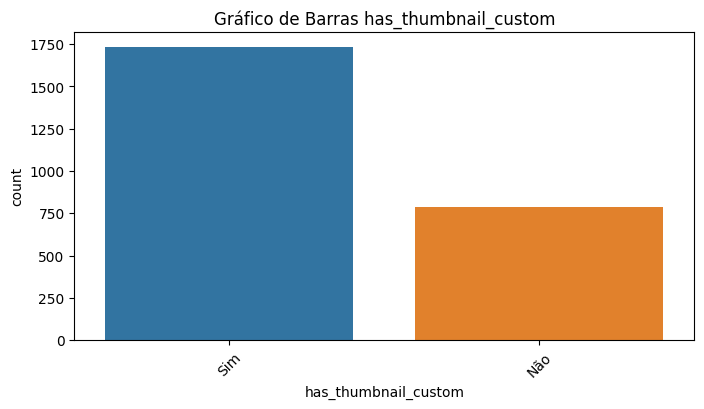


video_quality:
video_quality
1080p    1284
720p      733
480p      260
4K        240
4k          3
Name: count, dtype: int64
Únicos: 5


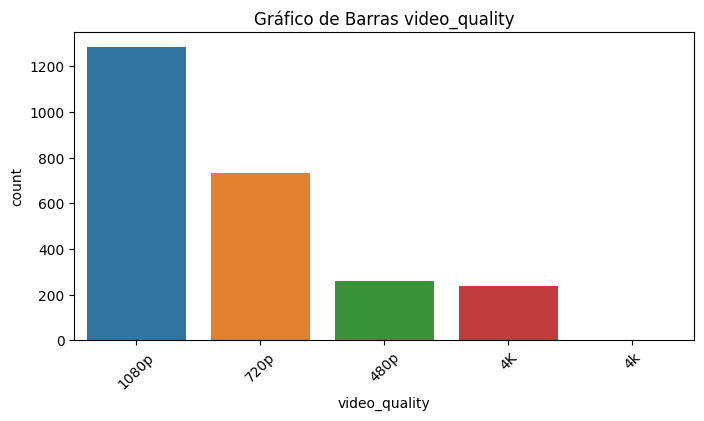


category:
category
Fitness         404
Gaming          362
Educação        355
Vlogs           354
Tecnologia      352
Culinária       343
Música          325
  Fitness         7
  Gaming          6
  Vlogs           3
  Educação        3
  Tecnologia      2
  Música          2
  Culinária       2
Name: count, dtype: int64
Únicos: 14


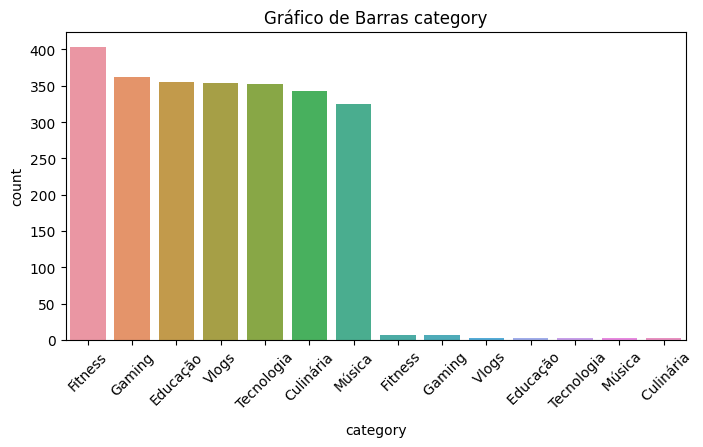


language:
language
Português    1513
Inglês        738
Espanhol      244
INGLÊS         11
PORTUGUÊS      11
ESPANHOL        3
Name: count, dtype: int64
Únicos: 6


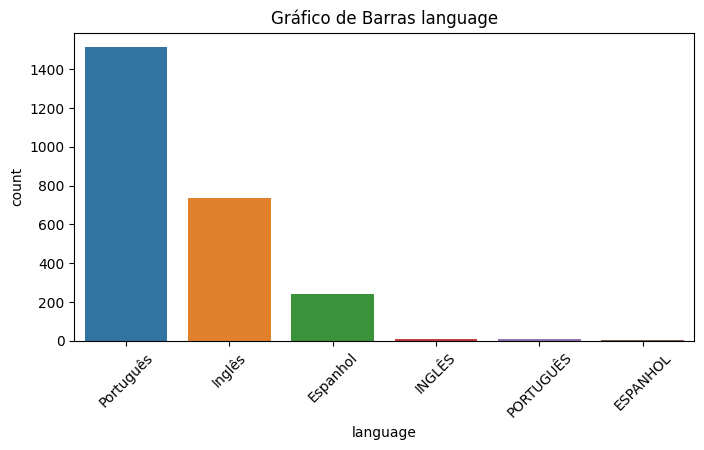


has_subtitles:
has_subtitles
Não    1477
Sim    1043
Name: count, dtype: int64
Únicos: 2


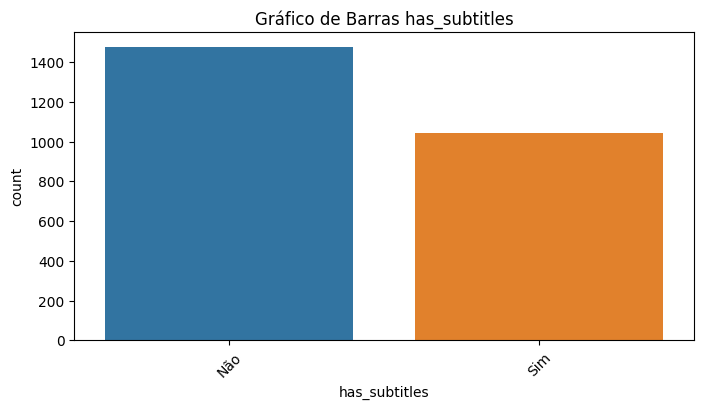


promoted:
promoted
Não    2138
Sim     382
Name: count, dtype: int64
Únicos: 2


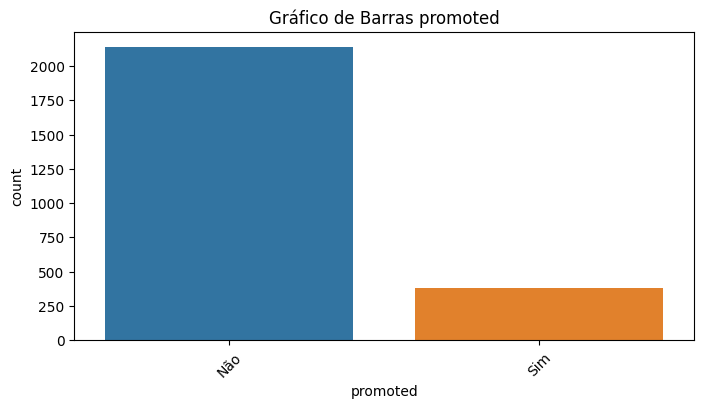


upload_time:
upload_time
Manhã        683
Noite        632
Madrugada    612
Tarde        593
Name: count, dtype: int64
Únicos: 4


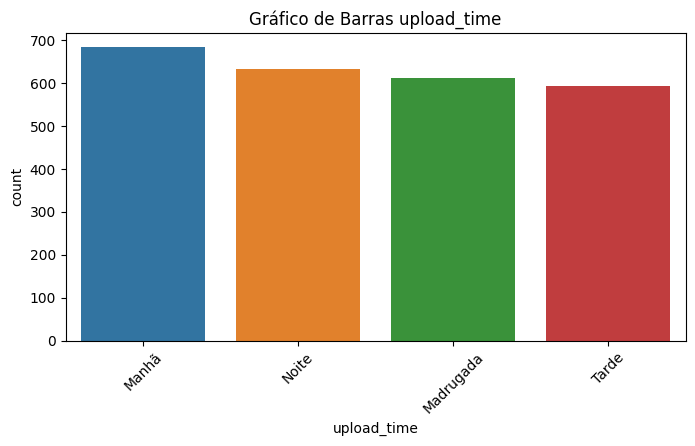


upload_day:
upload_day
Domingo    662
Sábado     635
Sexta      634
Seg-Qui    589
Name: count, dtype: int64
Únicos: 4


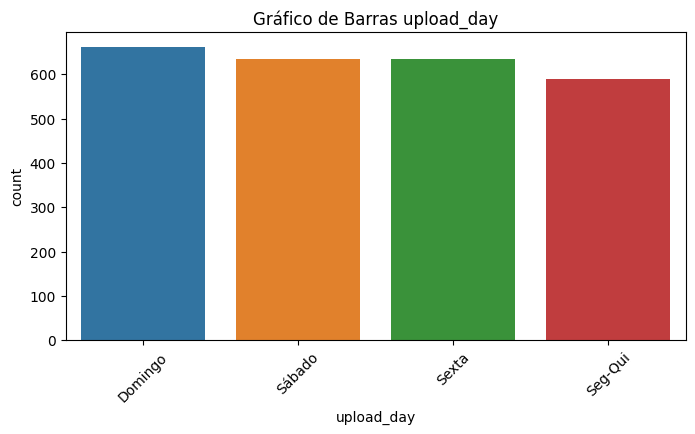

In [20]:
for var in categoricas:
    print(f"\n{var}:")
    print(df[var].value_counts())
    print("Únicos:", df[var].nunique())
    
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[var], order=df[var].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Gráfico de Barras {var}")
    plt.show()

### Desbalanceamento: Sim, ex: category (mais Gaming/Culinária que outros) / language (mais Português).
### Problemas de formatação: Sim, ex: "PORTUGUÊS" em maiúscula inconsistente, espaços em "  Música".
### Categorias inesperadas: "Sim/Não" consistentes, mas upload_day como "Seg-Qui" (agrupado?).

# 8° Etapa: Análise de Correlações

Matriz com corr(), heatmap. Correlação com alvo: corrwith(df['total_views']). Multicolinearidade: >0.7 entre vars.

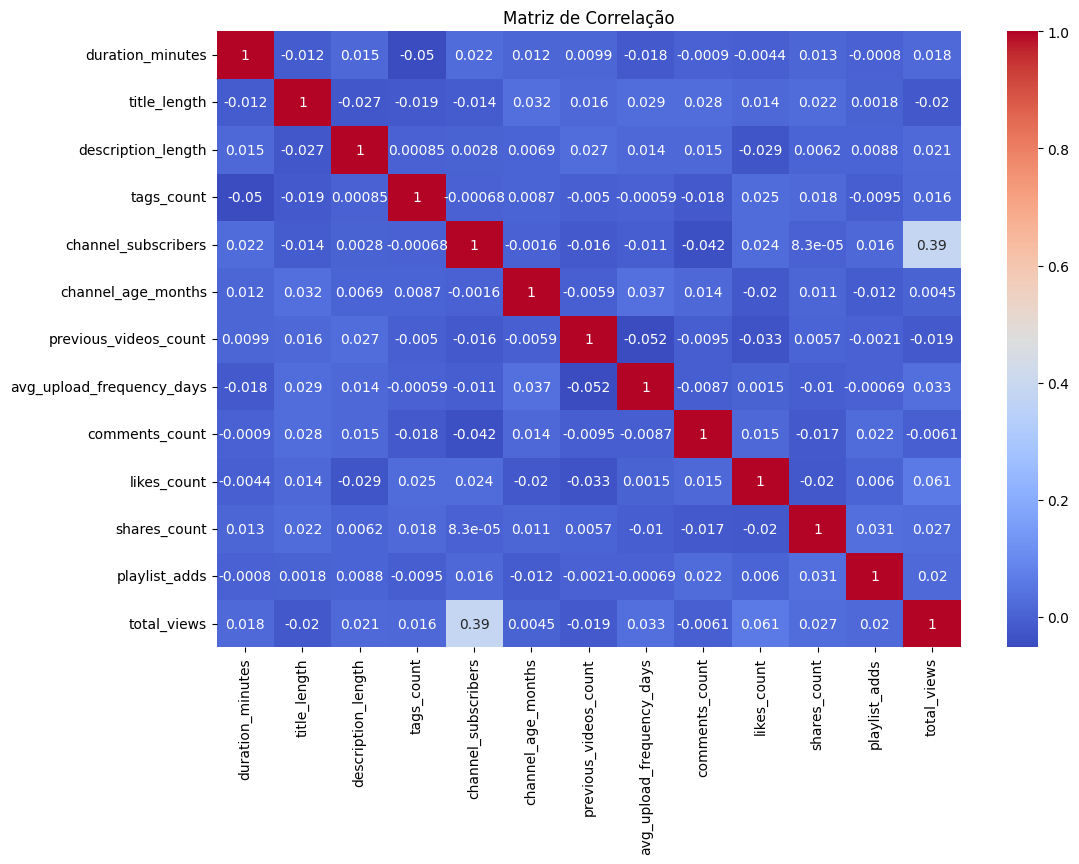

total_views                  1.000000
channel_subscribers          0.386395
likes_count                  0.060853
avg_upload_frequency_days    0.033115
shares_count                 0.027454
description_length           0.020753
playlist_adds                0.019515
duration_minutes             0.018443
tags_count                   0.016475
channel_age_months           0.004486
comments_count              -0.006084
previous_videos_count       -0.018659
title_length                -0.020091
dtype: float64


In [21]:
corr_matrix = df[numericas].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

corr_alvo = df[numericas].corrwith(df['total_views'])
print(corr_alvo.sort_values(ascending=False))

# 9° Etapa: Análise Bivariada

Para categóricas vs. total_views: groupby mean/median, boxplots.


video_id vs total_views:
               mean     median  count
video_id                             
VID00001   688069.0   688069.0      1
VID00002   840583.0   840583.0      1
VID00003   889685.0   889685.0      1
VID00004  1620391.0  1620391.0      1
VID00005  3158592.0  3158592.0      1
...             ...        ...    ...
VID57729   445221.0   445221.0      1
VID61003   570759.0   570759.0      1
VID72336   470771.0   470771.0      1
VID74271   391205.0   391205.0      1
VID96761  1038932.0  1038932.0      1

[2520 rows x 3 columns]


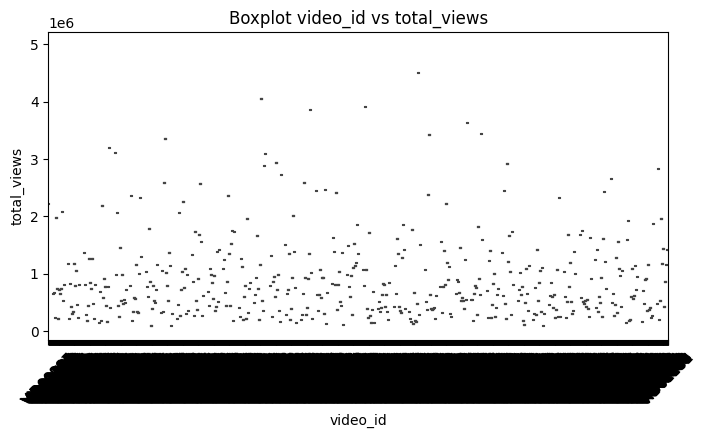


has_thumbnail_custom vs total_views:
                               mean    median  count
has_thumbnail_custom                                
Não                   840940.181934  639570.5    786
Sim                   869334.302768  649348.0   1734


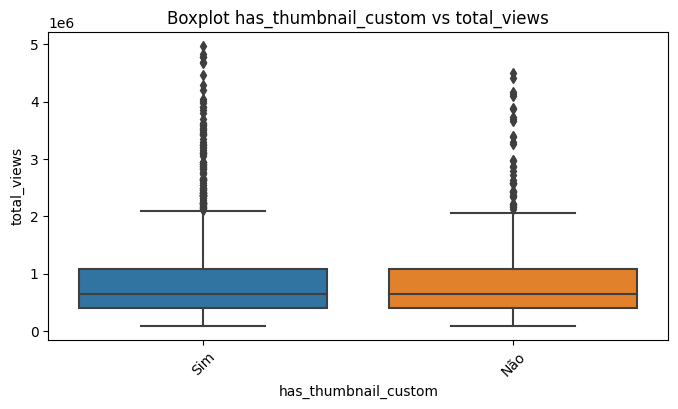


video_quality vs total_views:
                       mean     median  count
video_quality                                
1080p          8.557839e+05   645418.0   1284
480p           8.713519e+05   668808.0    260
4K             8.305358e+05   653818.0    240
4k             1.057947e+06  1151878.0      3
720p           8.738393e+05   636753.0    733


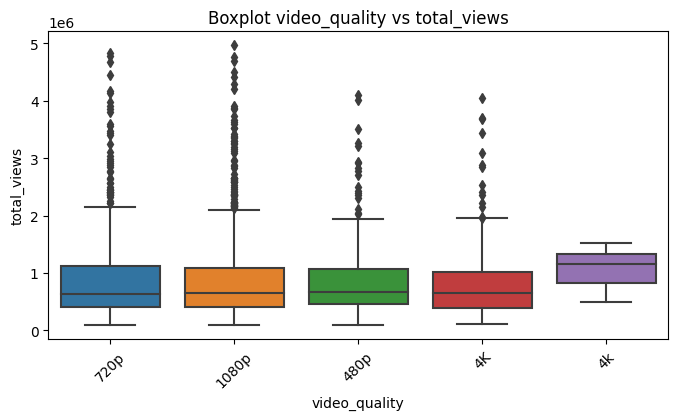


category vs total_views:
                      mean     median  count
category                                    
  Culinária   3.949685e+05   394968.5      2
  Educação    8.351597e+05   553678.0      3
  Fitness     5.249109e+05   564996.0      7
  Gaming      1.169509e+06  1161813.5      6
  Música      1.100750e+06  1100750.0      2
  Tecnologia  6.502390e+05   650239.0      2
  Vlogs       1.387445e+06  1666003.0      3
Culinária     7.085413e+05   564215.0    343
Educação      5.764553e+05   483816.0    355
Fitness       6.733614e+05   583041.5    404
Gaming        1.166509e+06   933370.5    362
Música        1.281107e+06  1109910.0    325
Tecnologia    9.062479e+05   760175.5    352
Vlogs         7.610423e+05   661635.0    354


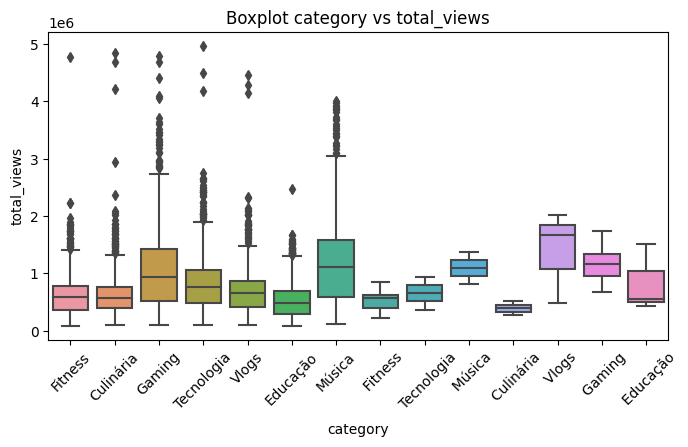


language vs total_views:
                   mean     median  count
language                                 
ESPANHOL   7.717237e+05   473325.0      3
Espanhol   8.193769e+05   689258.5    244
INGLÊS     1.696686e+06  1189157.0     11
Inglês     1.409843e+06  1271571.0    738
PORTUGUÊS  5.668168e+05   588371.0     11
Português  5.953725e+05   520093.0   1513


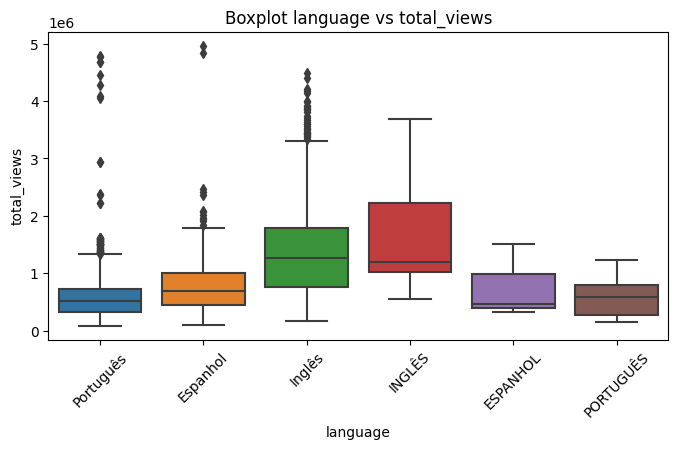


has_subtitles vs total_views:
                        mean    median  count
has_subtitles                                
Não            852329.277590  640085.0   1477
Sim            872017.565676  659996.0   1043


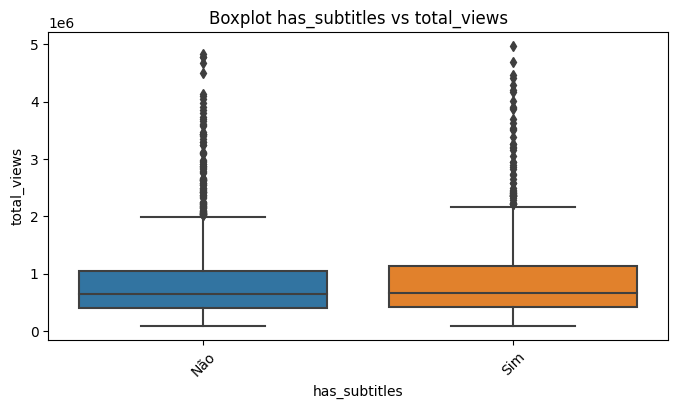


promoted vs total_views:
                   mean    median  count
promoted                                
Não       842874.640786  627046.5   2138
Sim       959001.785340  743726.5    382


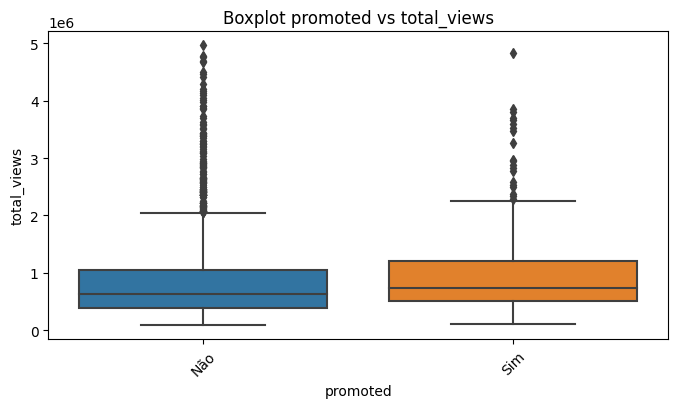


upload_time vs total_views:
                      mean    median  count
upload_time                                
Madrugada    869084.233660  666077.5    612
Manhã        882594.478770  643828.0    683
Noite        841595.659810  616009.5    632
Tarde        846247.263069  664567.0    593


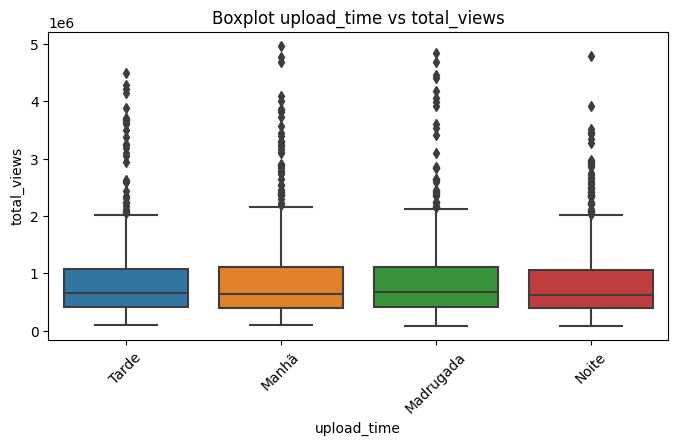


upload_day vs total_views:
                     mean    median  count
upload_day                                
Domingo     878931.341390  661975.5    662
Seg-Qui     878725.573854  645835.0    589
Sexta       848007.099369  635204.5    634
Sábado      836765.751181  641113.0    635


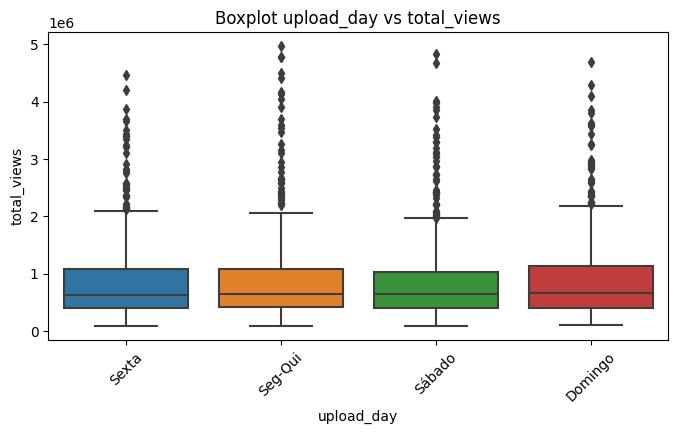

In [22]:
for var in categoricas:
    print(f"\n{var} vs total_views:")
    print(df.groupby(var)['total_views'].agg(['mean', 'median', 'count']))
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[var], y=df['total_views'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot {var} vs total_views')
    plt.show()

### Melhor desempenho (mais views): Categoria Gaming/Música; Language Inglês.
### Diferenças significativas: Sim (boxplots mostram mediana maior em Inglês).
### Sobreposição: Sim, muita variabilidade dentro de categorias.

# 10° Etapa: Identificação de Outliers

Usando IQR por numérica.

In [23]:
for var in num_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))]
    print(f"{var}: Outliers={len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

duration_minutes: Outliers=15 (0.60%)
title_length: Outliers=0 (0.00%)
description_length: Outliers=0 (0.00%)
tags_count: Outliers=0 (0.00%)
channel_subscribers: Outliers=15 (0.60%)
channel_age_months: Outliers=0 (0.00%)
previous_videos_count: Outliers=0 (0.00%)
avg_upload_frequency_days: Outliers=0 (0.00%)
comments_count: Outliers=0 (0.00%)
likes_count: Outliers=0 (0.00%)
shares_count: Outliers=0 (0.00%)
playlist_adds: Outliers=0 (0.00%)


### Mais outliers: channel_subscribers (vídeos virais/canais grandes).
### Legítimos: Sim, views altas são possíveis, Erros: duration negativa.

# 11° Etapa: Conclusões e Descobertas

Principais características: Dataset com ~100 entradas, 21 variáveis (13 numéricas, 8 categóricas) com faltantes (~10-20% em algumas cols) e inconsistências.

Problemas identificados: Faltantes em description_length/tags_count; Outliers em views/subscribers; Inconsistências como duration negativa, formatação em language/category 
(maiúsculas/espaços).

Features mais importantes: likes_count, comments_count (alta corr), category/language (diferenças bivariadas).

Próximos passos: Limpar faltantes/outliers, feature engineering (ex: binning duration), modelagem preditiva (regressão para prever views).